Spam Message Classification Project

Author: Christopher Chan

1. Data Preprocessing
2. Random Forest Model
  a. Building Model
  b. Predicting Model
3. SVM Model
  a. Building Model
  b. Predicting Model
4. LogR Model
  a. Building Model
  b. Predicting Model
5. Voting Classifier Model
  a. Building Model
  b. Predicting Model

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

1. Data Preprocessing

In [7]:
df = pd.read_csv("/content/sample_data/spam.tsv", sep ='\t')

In [8]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [9]:
df.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [10]:
df.dtypes

label      object
message    object
length      int64
punct       int64
dtype: object

In [11]:
df.info

<bound method DataFrame.info of      label                                            message  length  punct
0      ham  Go until jurong point, crazy.. Available only ...     111      9
1      ham                      Ok lar... Joking wif u oni...      29      6
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3      ham  U dun say so early hor... U c already then say...      49      6
4      ham  Nah I don't think he goes to usf, he lives aro...      61      2
...    ...                                                ...     ...    ...
5567  spam  This is the 2nd time we have tried 2 contact u...     160      8
5568   ham               Will ü b going to esplanade fr home?      36      1
5569   ham  Pity, * was in mood for that. So...any other s...      57      7
5570   ham  The guy did some bitching but I acted like i'd...     125      1
5571   ham                         Rofl. Its true to its name      26      1

[5572 rows x 4 columns]>

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
length,5572.0,80.489950,59.942907,2.0,36.0,62.0,122.0,910.0
punct,5572.0,4.177495,4.623919,0.0,2.0,3.0,6.0,133.0


In [13]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [14]:
df['label'].value_counts() / len(df)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

Test set is not balanced > Can lead to biased performance > Will try SMOTE

Attempted Solution

1. Randomly select n entries from ham data, where n = the number of spam rows
2. Concat the randomly selected ham rows with spam rows

In [15]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']
print(spam.shape)
print(ham.shape)

(747, 4)
(4825, 4)


In [16]:
ham = ham.sample(spam.shape[0])
print(spam.shape)
print(ham.shape)

(747, 4)
(747, 4)


In [17]:
data = pd.concat([ham, spam])

In [18]:
data.shape

(1494, 4)

In [19]:
data['label'].value_counts() / len(ham)

ham     1.0
spam    1.0
Name: label, dtype: float64

Successfully balanced the dataset

ETL

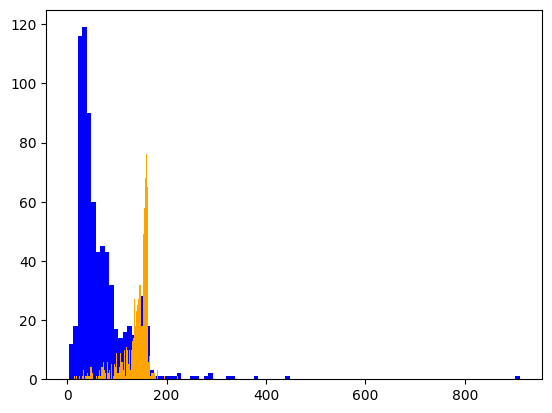

In [20]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, color='b')
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, color='orange')
plt.show()

Spam data generally have higher text length than ham data

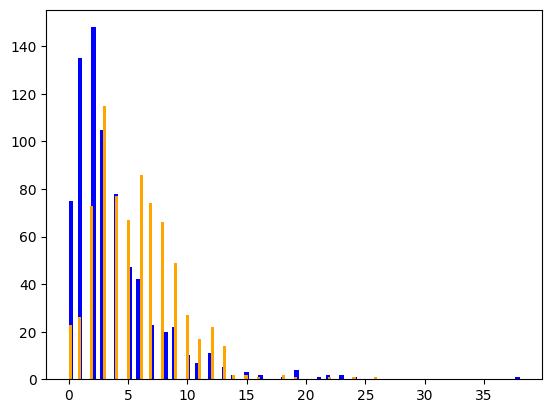

In [21]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, color='b')
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, color='orange')
plt.show()

Minimal dependency between spam classification and number of punct

label
message
length
punct


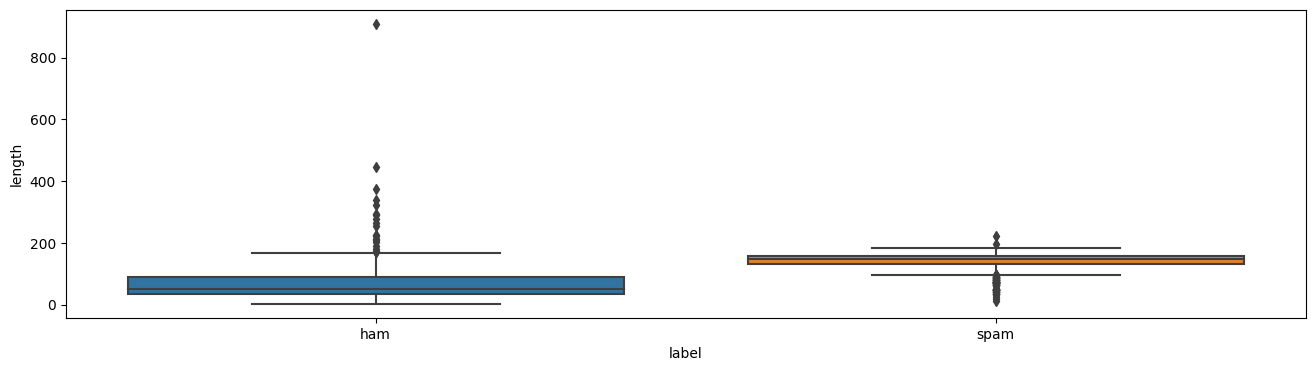

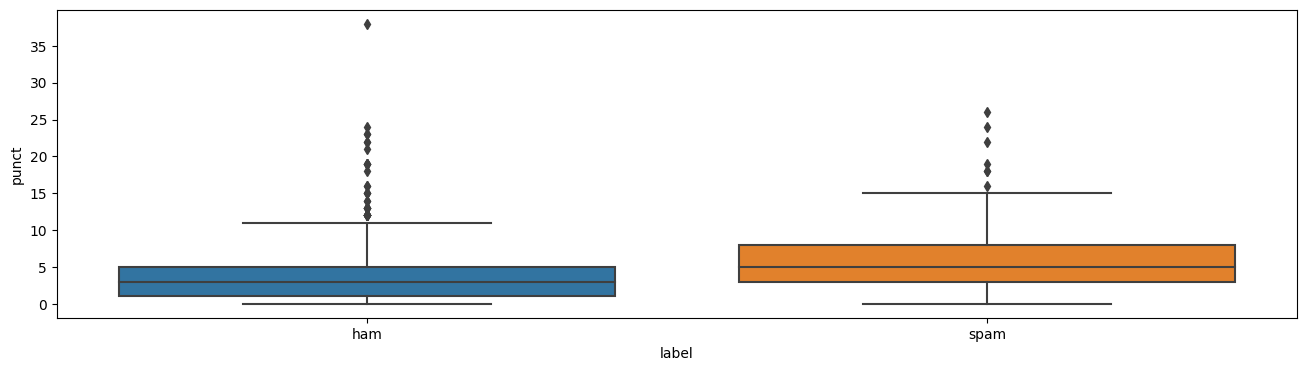

In [22]:
for column in df:
  print(column)
  if column not in ["label", "message"]:
    plt.figure(figsize=(16, 4))
    sns.boxplot(data = data, x = 'label', y = column)

Random Forest


In [23]:
X_train, X_test, y_train, y_test =  train_test_split(data['message'], data['label'], test_size = 0.3, random_state = 0, shuffle = True)

In [24]:
print(X_train.shape)
print(X_test.shape)

(1045,)
(449,)


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline

In [26]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

In [27]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.9443207126948775

In [30]:
confusion_matrix(y_test, y_pred)

array([[224,   3],
       [ 22, 200]])

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       227
        spam       0.99      0.90      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



Support Vector Machine

In [32]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto', probability=True))])

In [33]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto', probability=True))])

In [34]:
y_pred = svm.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred)

0.9532293986636972

In [36]:
confusion_matrix(y_test, y_pred)

array([[224,   3],
       [ 18, 204]])

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       227
        spam       0.99      0.92      0.95       222

    accuracy                           0.95       449
   macro avg       0.96      0.95      0.95       449
weighted avg       0.96      0.95      0.95       449



Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logR = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", LogisticRegression())])

In [40]:
logR.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [41]:
y_pred = logR.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred)

0.9621380846325167

In [43]:
confusion_matrix(y_test, y_pred)

array([[223,   4],
       [ 13, 209]])

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.94      0.98      0.96       227
        spam       0.98      0.94      0.96       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



Voting

In [45]:
voting_classifier = VotingClassifier(estimators=[
    ('rf', classifier),
    ('svm', svm),
    ('logr', logR)], voting='soft')

In [46]:
voting_classifier.fit(X_train, y_train)


VotingClassifier(estimators=[('rf',
                              Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                              ('classifier',
                                               RandomForestClassifier())])),
                             ('svm',
                              Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                              ('classifier',
                                               SVC(C=100, gamma='auto',
                                                   probability=True))])),
                             ('logr',
                              Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                              ('classifier',
                                               LogisticRegression())]))],
                 voting='soft')

In [47]:
voting_predictions = voting_classifier.predict(X_test)

In [48]:
accuracy_score(y_test, voting_predictions)

0.9621380846325167

In [49]:
print(classification_report(y_test, voting_predictions))

              precision    recall  f1-score   support

         ham       0.94      0.99      0.96       227
        spam       0.99      0.94      0.96       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [50]:
test = ['Congratulations, You won a lottery ticket worth $100 Million! Please send $100 to claim the ticket']

In [53]:
print(classifier.predict(test))
print(svm.predict(test))
print(logR.predict(test))
print(voting_classifier.predict(test))

['spam']
['spam']
['spam']
['spam']
